<a href="https://colab.research.google.com/github/nhanhd06/assignment_4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
! pip install pycaret

In [14]:
# Import library
from pycaret.utils import enable_colab
from pycaret.classification import *
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

TypeError: ignored

In [15]:
# Load iris flowers data and show its description
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
# Print row data names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# Print column data names
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [18]:
x = pd.DataFrame(data.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(data.target, columns=['Target_Names'])

In [19]:
# Print first few columns of y dataset
y.head()

,Target_Names
0,0
1,0
2,0
3,0
4,0


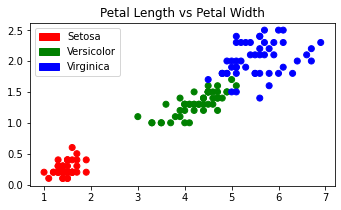

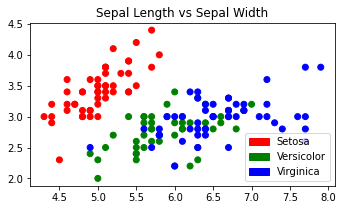

In [20]:
# Print out the current scatter plot of both sepal and petal data 
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 2)

# Create color label legend sets and associate it with target name column of main dataset
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(data.target_names)

# Asssociate the color to each flower name
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

# Scatter plot for petal sets 
plt.scatter(x['Petal_Length'], x['Petal_Width'], c= colors[y['Target_Names']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Scatter plot for sepal sets
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)

plt.scatter(x['Sepal_Length'], x['Sepal_Width'], c=colors[y['Target_Names']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [21]:
# Created new dataset - pedal and sepal which each contains its own associated columns
pedal_set = pd.DataFrame(x.Petal_Length)
pedal_set['Pedal_Width'] = pd.DataFrame(x.Petal_Width)
sepal_set = pd.DataFrame(x.Sepal_Length)
sepal_set['Sepal_Width'] = pd.DataFrame(x.Sepal_Width)

In [22]:
# Begin implemented K Means Clustering using number of cluster = 3
k_mean = KMeans(n_clusters=3)
k_mean_pedal_set = k_mean.fit_predict(pedal_set)
k_mean2 = KMeans(n_clusters=3)
k_mean_sepal_set = k_mean2.fit_predict(sepal_set)

In [23]:
# Add the output cluster to pedal dataset
pedal_set['Cluster'] = k_mean_pedal_set
pedal_set.head()

,Petal_Length,Pedal_Width,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [24]:
# Add the output cluster to sepal dataset
sepal_set['Cluster'] = k_mean_sepal_set
sepal_set.head()

,Sepal_Length,Sepal_Width,Cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


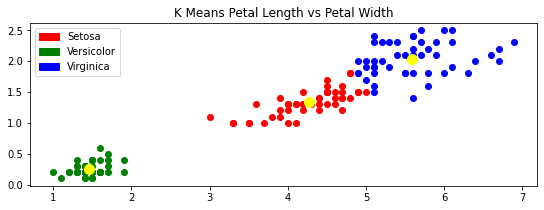

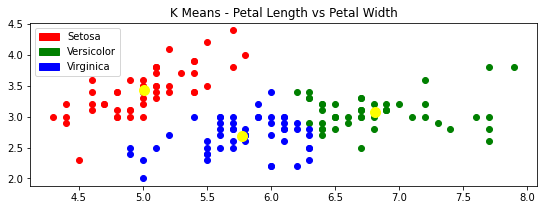

In [26]:
# Plot the scatter for both petal and sepal data set and visualize the Clusters
plt.figure(figsize=(20,3))
plt.subplot(1, 2, 2)

df1 = pedal_set[pedal_set.Cluster==0]
df2 = pedal_set[pedal_set.Cluster==1]
df3 = pedal_set[pedal_set.Cluster==2]

plt.scatter(df1['Petal_Length'],df1['Pedal_Width'],color='red')
plt.scatter(df2['Petal_Length'],df2['Pedal_Width'],color='green')
plt.scatter(df3['Petal_Length'],df3['Pedal_Width'],color='blue')
plt.scatter(k_mean.cluster_centers_[:, 0], k_mean.cluster_centers_[:,1], s=100, color='yellow')
plt.title('K Means Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])


plt.figure(figsize=(20,3))
plt.subplot(1, 2, 1)

df1 = sepal_set[sepal_set.Cluster==0]
df2 = sepal_set[sepal_set.Cluster==1]
df3 = sepal_set[sepal_set.Cluster==2]

plt.scatter(df1['Sepal_Length'],df1['Sepal_Width'],color='red')
plt.scatter(df2['Sepal_Length'],df2['Sepal_Width'],color='green')
plt.scatter(df3['Sepal_Length'],df3['Sepal_Width'],color='blue')
plt.scatter(k_mean2.cluster_centers_[:, 0], k_mean2.cluster_centers_[:,1], s=100, color='yellow')
plt.title('K Means - Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [ ]:
# ======Hierarchical Clustering======

In [ ]:
# Created new dataset - pedal and sepal which each contains its own associated columns
pedal_set = pd.DataFrame(x.Petal_Length)
pedal_set['Pedal_Width'] = pd.DataFrame(x.Petal_Width)
sepal_set = pd.DataFrame(x.Sepal_Length)
sepal_set['Sepal_Width'] = pd.DataFrame(x.Sepal_Width)

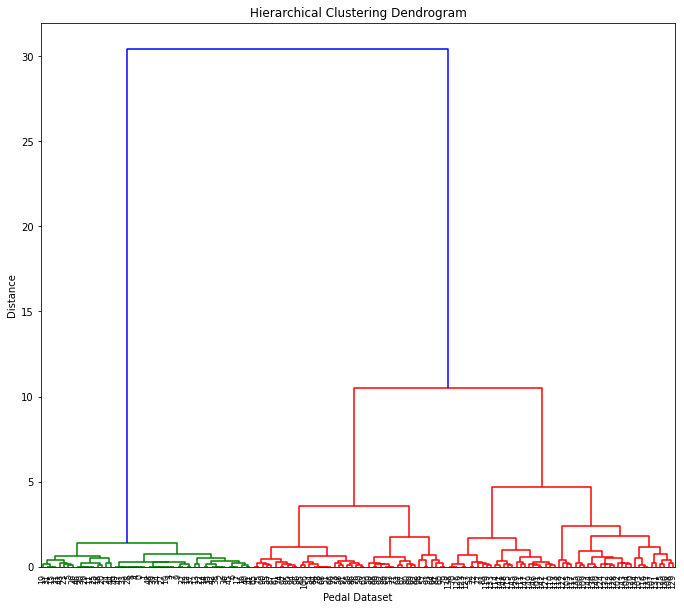

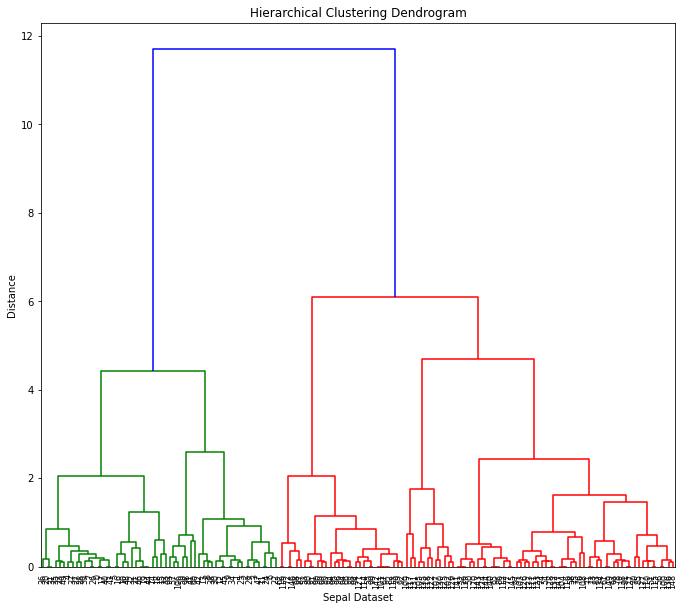

In [ ]:
# Drawing dendogram for pedal and sepal datasets with mode - lastp that shows only the last p merged clusters => About 3
links = linkage(pedal_set, 'ward')

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Pedal Dataset')
plt.ylabel('Distance')
dendrogram(links, truncate_mode='lastp', p=150, leaf_rotation=90., leaf_font_size=8.)
plt.show()

links = linkage(sepal_set, 'ward')
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sepal Dataset')
plt.ylabel('Distance')
dendrogram(links, truncate_mode='lastp', p=150, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [ ]:
# Using AgglomerativeClustering method with number of cluster as suggested above = 3 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster = cluster.fit_predict(pedal_set)
pedal_set['Cluster'] = cluster

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster = cluster.fit_predict(sepal_set)
sepal_set['Cluster'] = cluster

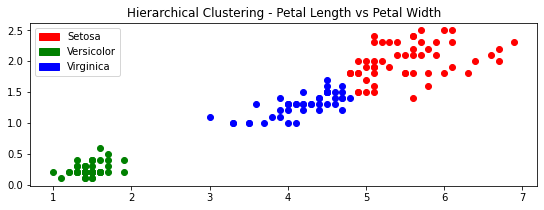

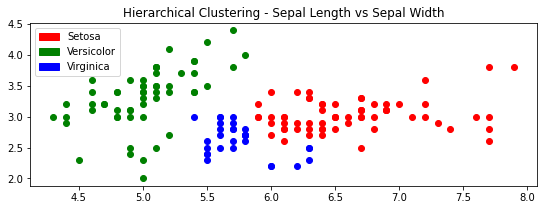

In [ ]:
# Draw Scatter Plot of both petal and sapal data sets
df1 = pedal_set[pedal_set.Cluster==0]
df2 = pedal_set[pedal_set.Cluster==1]
df3 = pedal_set[pedal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 1)
plt.scatter(df1['Petal_Length'],df1['Pedal_Width'],color='red')
plt.scatter(df2['Petal_Length'],df2['Pedal_Width'],color='green')
plt.scatter(df3['Petal_Length'],df3['Pedal_Width'],color='blue')
plt.title('Hierarchical Clustering - Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

df1 = sepal_set[sepal_set.Cluster==0]
df2 = sepal_set[sepal_set.Cluster==1]
df3 = sepal_set[sepal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 2)
plt.scatter(df1['Sepal_Length'],df1['Sepal_Width'],color='red')
plt.scatter(df2['Sepal_Length'],df2['Sepal_Width'],color='green')
plt.scatter(df3['Sepal_Length'],df3['Sepal_Width'],color='blue')
plt.title('Hierarchical Clustering - Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [ ]:
# ======Gaussian Mixture Clustering======

In [ ]:
# Created new dataset - pedal and sepal which each contains its own associated columns
pedal_set = pd.DataFrame(x.Petal_Length)
pedal_set['Pedal_Width'] = pd.DataFrame(x.Petal_Width)
sepal_set = pd.DataFrame(x.Sepal_Length)
sepal_set['Sepal_Width'] = pd.DataFrame(x.Sepal_Width)

In [ ]:
# Using GaussianMixture with known k mean number = n_components: 5   
gmm = GaussianMixture(n_components = 3) 
gmm = gmm.fit_predict(pedal_set)
pedal_set['Cluster'] = gmm

gmm = GaussianMixture(n_components = 3) 
gmm = gmm.fit_predict(sepal_set)
sepal_set['Cluster'] = gmm

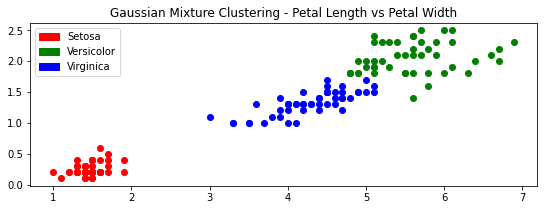

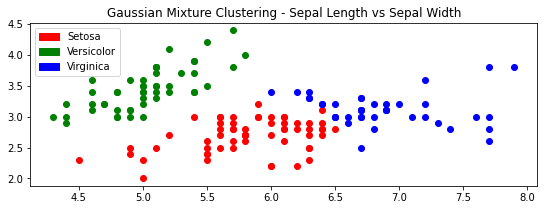

In [ ]:
# Draw Scatter Plot of both petal and sapal data sets
df1 = pedal_set[pedal_set.Cluster==0]
df2 = pedal_set[pedal_set.Cluster==1]
df3 = pedal_set[pedal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 1)
plt.scatter(df1['Petal_Length'],df1['Pedal_Width'],color='red')
plt.scatter(df2['Petal_Length'],df2['Pedal_Width'],color='green')
plt.scatter(df3['Petal_Length'],df3['Pedal_Width'],color='blue')
plt.title('Gaussian Mixture Clustering - Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

df1 = sepal_set[sepal_set.Cluster==0]
df2 = sepal_set[sepal_set.Cluster==1]
df3 = sepal_set[sepal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 2)
plt.scatter(df1['Sepal_Length'],df1['Sepal_Width'],color='red')
plt.scatter(df2['Sepal_Length'],df2['Sepal_Width'],color='green')
plt.scatter(df3['Sepal_Length'],df3['Sepal_Width'],color='blue')
plt.title('Gaussian Mixture Clustering - Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [ ]:
# ======DB Scan Clustering======

In [38]:
# Created new dataset - pedal and sepal which each contains its own associated columns
pedal_set = pd.DataFrame(x.Petal_Length)
pedal_set['Pedal_Width'] = pd.DataFrame(x.Petal_Width)
sepal_set = pd.DataFrame(x.Sepal_Length)
sepal_set['Sepal_Width'] = pd.DataFrame(x.Sepal_Width)

In [56]:
# Using DBSCAN with epislon distance number = 0.2 and minimum sample = 8 since Pycaret is broken and could not be imported
db_scan = DBSCAN(eps=0.2, min_samples=8) 
db_scan = db_scan.fit_predict(pedal_set)
pedal_set['Cluster'] = db_scan

db_scan = DBSCAN(eps=0.2, min_samples=8) 
db_scan = db_scan.fit_predict(sepal_set)
sepal_set['Cluster'] = db_scan

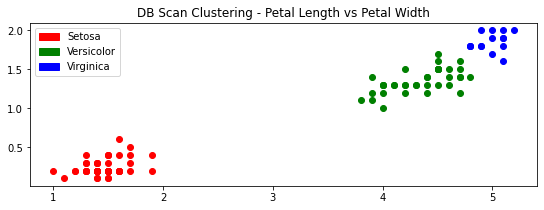

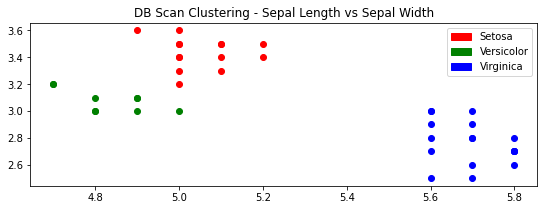

In [59]:
# Draw Scatter Plot of both petal and sapal data sets
df1 = pedal_set[pedal_set.Cluster==0]
df2 = pedal_set[pedal_set.Cluster==1]
df3 = pedal_set[pedal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 1)
plt.scatter(df1['Petal_Length'],df1['Pedal_Width'],color='red')
plt.scatter(df2['Petal_Length'],df2['Pedal_Width'],color='green')
plt.scatter(df3['Petal_Length'],df3['Pedal_Width'],color='blue')
plt.title('DB Scan Clustering - Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

df1 = sepal_set[sepal_set.Cluster==0]
df2 = sepal_set[sepal_set.Cluster==1]
df3 = sepal_set[sepal_set.Cluster==2]

plt.figure(figsize=(20,3))
plt.subplot(1, 2, 2)
plt.scatter(df1['Sepal_Length'],df1['Sepal_Width'],color='red')
plt.scatter(df2['Sepal_Length'],df2['Sepal_Width'],color='green')
plt.scatter(df3['Sepal_Length'],df3['Sepal_Width'],color='blue')
plt.title('DB Scan Clustering - Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])